# Máximo de la curva de Laffer

A continuación se presenta un ejercicio analítico cuyo objetivo es obtener los determinantes del máximo de una curva de Laffer muy sencilla mediante el uso de la librería de lenguaje simbólico de Python *Sympy*.

Partimos de la curva de Laffer obtenida en el resto de los ejercicios del respositorio

## Importamos las librerías necesarias


In [3]:
from sympy import *

from IPython.display import Markdown

import matplotlib.pyplot as plt

%matplotlib inline

init_printing()

## Definimos los símbolos

In [4]:
K, A, Y, N, a, R, w, t, g, U, c, N = symbols( 'K A Y N alpha R w tau_l \gamma U c N')

Empezamos por el problema del consumidor, definido por la función de utilidad y la restricción de presupuesto

## Función de utilidad

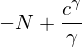

In [5]:
U = (c**g)/g - N
U

## Restricción de presupuesto

In [6]:
C = (1-t)*w*N
C

Sustituimos la restricción de presupuesto en la función de utilidad

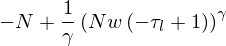

In [7]:
U = (((1-t)*w*N)**g)/g - N
U

Calculamos la utilidad marginal

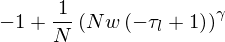

In [8]:
Umg = U.diff(N)
Umg

Obtenemos el nivel de empleo que maximiza la utilidad $Umg = 0$

In [9]:
solve(Umg,N)

NotImplementedError: multiple generators [(-N*tau_l*w + N*w)**\gamma, N]
No algorithms are implemented to solve equation -1 + (N*w*(-tau_l + 1))**\gamma/N

**Dado el error enunciamos directamente la oferta de trabajo**

A partir de estas expresiones obtenemos la oferta de trabajo

In [11]:
ON = ((1-t)*w)**(g/(1-g))
ON

Ahora pasemos al lado de la producción

## Función de Producción

In [12]:
Y = A*K**(a)*N**(1-a)
Y

Calculamos el producto marginal

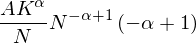

In [13]:
PMN = Y.diff(N)
PMN

Obtenemos la demanda de trabajo como aquel que iguala el producto marginal al salario real

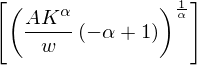

In [14]:
DN = solve(PMN-w, N)
DN

## Nivel de empleo de equilibrio

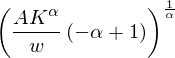

In [20]:
#Como DN es una lista, hago esto para que lo lea como una formula
DNN=DN[0]
DNN

Resolvemos para el nivel de salario de equilibrio

In [21]:
solve(ON-DDN, w)

NotImplementedError: multiple generators [(-A*K**alpha*alpha/w + A*K**alpha/w)**(1/alpha), (-tau_l*w + w)**(\gamma/(-\gamma + 1))]
No algorithms are implemented to solve equation (w*(-tau_l + 1))**(\gamma/(-\gamma + 1)) - (A*K**alpha*(-alpha + 1)/w)**(1/alpha)

Otro error :-/ aparcamos esto acá de momento

## Recaudación

La recaudación viene dada por el tipo impositivo $\tau_l$ multiplicado por el total de rentas salariales $W\times N$

In [13]:
R = w*t*ON
R

Empleando la oferta de trabajo en la expresión anterior, observamos que la recaudación depende (en parte, si sustituimos $w$ por su versión de equilibrio tambien entrarían los parámetros de la función de producción) del salario, el tipo impositivo y de la importancia relativa del consumo en la función de utilidad.

Si maximizamos la recaudación con respecto al tipo impositivo ¿qué obtendríamos?. Primero derivamos

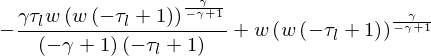

In [15]:
Rp=R.diff(t)
Rp

Resolvemos esta ecuación para $\tau_l$

In [16]:
solve(Rp,t)

El máximo de la curva de Laffer solo depende de la importancia relativa del consumo en la función de utilidad, parámetro determinante de la elasticidad de la oferta de trabajo

**el máximo debería depender también de los parámetros de la función de producción, pero como no hemos empleado el salario de equilibrio en la recaudación no se observa**